In [62]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
data = {
    "Experience_Years": [
        0.5,0.8,1.0,1.3,1.6,2.0,2.3,2.7,3.0,3.4,
        3.8,4.0,4.3,4.7,5.0,5.4,5.8,6.0,6.4,6.8,
        7.0,7.3,7.7,8.0,8.4,8.7,9.0
    ],
    "Salary_LPA": [
        3.2,3.0,2.9,3.1,3.0,3.2,3.4,3.6,3.9,4.2,
        4.6,5.0,5.6,6.2,6.8,7.6,8.5,9.4,10.5,11.7,
        12.8,14.0,15.4,16.9,18.5,20.2,22.0
    ]
}

In [29]:
df=pd.DataFrame(data)

In [30]:
df.head()

,Experience_Years,Salary_LPA
0,0.5,3.2
1,0.8,3.0
2,1.0,2.9
3,1.3,3.1
4,1.6,3.0


In [31]:
df.isnull().sum()

Experience_Years    0
Salary_LPA          0
dtype: int64

In [32]:
df.describe()

,Experience_Years,Salary_LPA
count,27.00000,27.000000
mean,4.70000,8.488889
std,2.64357,5.925261
min,0.50000,2.900000
25%,2.50000,3.500000
50%,4.70000,6.200000
75%,6.90000,12.250000
max,9.00000,22.000000


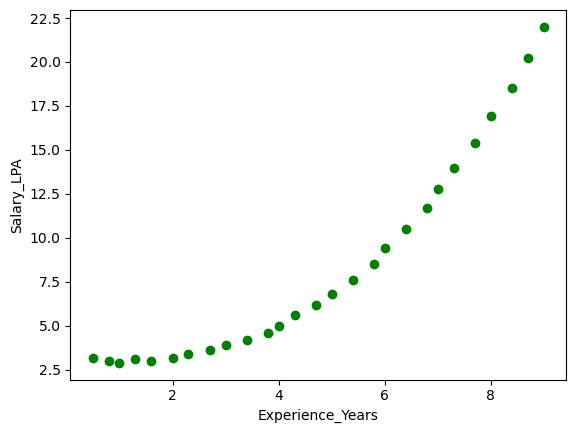

In [33]:
plt.scatter(df['Experience_Years'],df['Salary_LPA'],color='g')
plt.xlabel('Experience_Years')
plt.ylabel('Salary_LPA')
plt.show()

In [34]:
X=df[['Experience_Years']]
y=df['Salary_LPA']

In [35]:
X.shape

(27, 1)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [38]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
from sklearn.metrics import r2_score
Score=r2_score(y_test,regression.predict(X_test))
print(Score)

0.6596027173529375


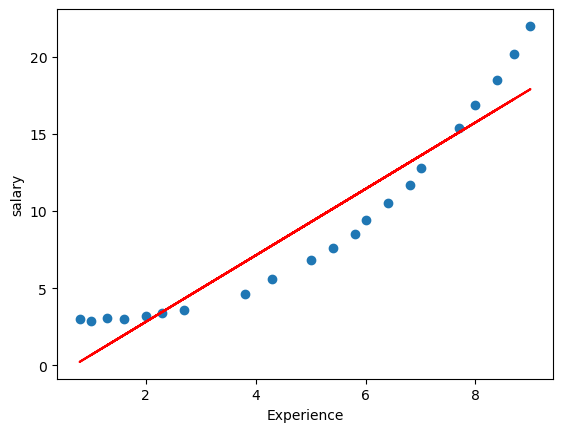

In [40]:
##visualize
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("Experience")
plt.ylabel("salary")
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [42]:
X_train_poly

array([[ 1.  ,  5.8 , 33.64],
       [ 1.  ,  6.  , 36.  ],
       [ 1.  ,  4.3 , 18.49],
       [ 1.  ,  8.4 , 70.56],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  5.4 , 29.16],
       [ 1.  ,  7.7 , 59.29],
       [ 1.  ,  1.3 ,  1.69],
       [ 1.  ,  8.7 , 75.69],
       [ 1.  ,  8.  , 64.  ],
       [ 1.  ,  6.4 , 40.96],
       [ 1.  ,  9.  , 81.  ],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  ,  2.7 ,  7.29],
       [ 1.  ,  3.8 , 14.44],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  6.8 , 46.24],
       [ 1.  ,  2.3 ,  5.29]])

In [44]:
from sklearn.metrics import r2_score
regression1=LinearRegression()
regression1.fit(X_train_poly,y_train)
y_pred=regression1.predict(X_test_poly)


In [46]:
score=r2_score(y_test,y_pred)
print(score)

0.9956937441878816


In [48]:

print(regression1.coef_)

[ 0.         -1.22780647  0.35312236]


In [49]:
print(regression1.intercept_)

4.058741463406108


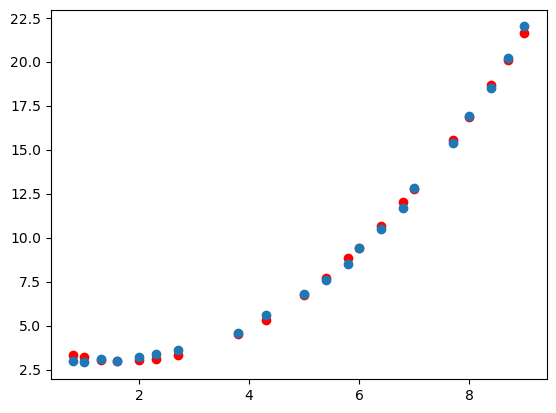

In [53]:
plt.scatter(X_train,regression1.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)
plt.show()

In [54]:
##predict new dataset
X_new = [[0.7], [1.2], [2.1], [2.9], [3.6], [4.4],
         [5.1], [5.9], [6.3], [6.9], [7.4], [8.1], [8.8]]

In [55]:
X_new_poly=poly.transform(X_new)
X_new_poly

c:\Users\fa00000\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.  ,  0.7 ,  0.49],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  2.1 ,  4.41],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  5.1 , 26.01],
       [ 1.  ,  5.9 , 34.81],
       [ 1.  ,  6.3 , 39.69],
       [ 1.  ,  6.9 , 47.61],
       [ 1.  ,  7.4 , 54.76],
       [ 1.  ,  8.1 , 65.61],
       [ 1.  ,  8.8 , 77.44]])

In [57]:
y_new=regression1.predict(X_new_poly)

In [58]:
y_new

array([ 3.37230689,  3.0938699 ,  3.03761747,  3.46786172,  4.21510392,
        5.49284182,  6.98164096,  9.10687252, 10.33898704, 12.39903222,
       14.30995383, 17.28186687, 20.59983981])

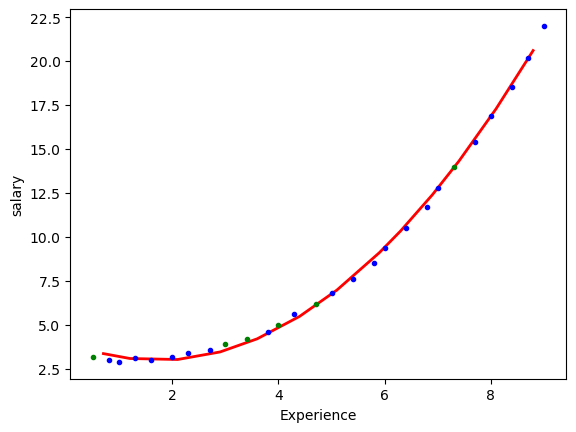

In [61]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="New predictions")
plt.plot(X_train,y_train,"b.",label="Training data")
plt.plot(X_test,y_test,"g.",label="Testing data")
plt.xlabel("Experience")
plt.ylabel("salary")
plt.show()